In [1]:
import math
import random
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def CLT_std_norm_rand():
    random_nums = [random.uniform(0, 1) for x in range(12)] 
    std_norm_rand = sum(random_nums) - 6
    return std_norm_rand

def gaussian_data_generator(mean, var, method=0):
    if method==0:
        std_norm_rand = CLT_std_norm_rand()
    norm_rand = mean + (std_norm_rand * var**(1/2))
    return norm_rand

def polynomial_linear_data_generator(num_basis, a, w, x):
    # x = [random.uniform(-10, 10) * 20 for x in range(num_basis)]
    # x[0] = 1
    e = gaussian_data_generator(0, a)
    y = np.dot(x, w) + e
    return y

In [3]:
class Estimator:

    def __init__(self):
        self.num_data = 0
        self.mean = 0
        self.var = 0

    def update(self, x):
        self.num_data += 1
        if self.num_data == 1:
            self.mean = x
            self.var = 0.0
        else:
            self.mean = self.mean + (x - self.mean) / self.num_data
            self.var = self.var + (x - self.mean)**2 / self.num_data - self.var / (self.num_data - 1)

    def estimate(self):
        return self.mean, self.var


def test_estimator(mean, var, max_iters=100000, batch_size=1000, threshold='auto'):

    if threshold == 'auto':
        model = Estimator()
        for i in range(1, batch_size+1):
            data = gaussian_data_generator(mean, var)
            model.update(data)
        mean_estimated, var_estimated = model.estimate()
        threshold = 0.0005 * var_estimated

    model = Estimator()
    last_mean, last_var = 0, 0

    for i in range(1, max_iters+1):
        data = gaussian_data_generator(mean, var)
        model.update(data)
        mean_estimated, var_estimated = model.estimate()
        print('Data:%.4f' % data, '\tMean:%.4f' % mean_estimated, '\tVar:%.4f' % var_estimated)
        if i % batch_size == 0:
            diff_mean = abs(mean_estimated-last_mean)
            diff_var = abs(var_estimated-last_var)

            if diff_mean < threshold and diff_var < threshold:
                break
            last_mean, last_var = mean_estimated, var_estimated

In [19]:
# Params
num_points = 20

w = [1, 1]
num_basis = len(w)
a = 1

xs = np.arange(-10, 10, 20/num_points)
phi_xs = np.array([[x**(d) for d in range(num_basis)] for x in xs])
ys = []

estimator = Estimator()
for i in range(num_points):
    x = phi_xs[i]
    y = polynomial_linear_data_generator(num_basis, a, w, x)
    ys.append(y)
     
    estimator.update(y)
    mu, s = estimator.estimate()
    if i < 10:
        continue
    likelihood = norm.pdf(y, loc=mu, scale=s**(1/2))
    print('l', likelihood)
    
ys = np.array(ys)

print(ys)
print(phi_xs)

l 0.041838998395583686
l 0.03190748841785402
l 0.028217405157397575
l 0.026593257597913388
l 0.043423971351026866
l 0.02674332088485098
l 0.01162962152277834
l 0.01419328222735282
l 0.013026240283906573
l 0.019752493849988517
[-8.93486878 -7.60121131 -7.125617   -7.76232485 -6.17894394 -4.25360689
 -3.43504636 -0.28430137 -2.17574908  0.11712454  0.26996702  1.52960214
  2.54413639  3.42703772  2.60538298  4.52888653  7.64152784  8.21741953
  9.50201037  8.9521068 ]
[[  1. -10.]
 [  1.  -9.]
 [  1.  -8.]
 [  1.  -7.]
 [  1.  -6.]
 [  1.  -5.]
 [  1.  -4.]
 [  1.  -3.]
 [  1.  -2.]
 [  1.  -1.]
 [  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]]


In [ ]:
estimator = Estimator()

(100, 100)
[[1.09754528e-23 1.75421873e-23 2.78667528e-23 ... 2.61083644e-16
  2.30435579e-16 2.02143941e-16]
 [2.94749521e-23 4.69661615e-23 7.43803730e-23 ... 5.21032259e-16
  4.58463899e-16 4.00947030e-16]
 [7.82925270e-23 1.24372090e-22 1.96366265e-22 ... 1.02845691e-15
  9.02188518e-16 7.86592525e-16]
 ...
 [3.00423424e-04 3.56820152e-04 4.21217380e-04 ... 2.22001934e-09
  1.45606550e-09 9.49175222e-10]
 [2.78425480e-04 3.29681990e-04 3.87992020e-04 ... 1.52892517e-09
  9.99726140e-10 6.49706468e-10]
 [2.55223527e-04 3.01285072e-04 3.53488954e-04 ... 1.04148314e-09
  6.78918627e-10 4.39870189e-10]]


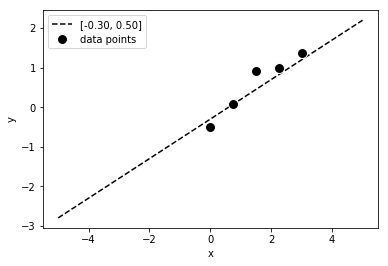

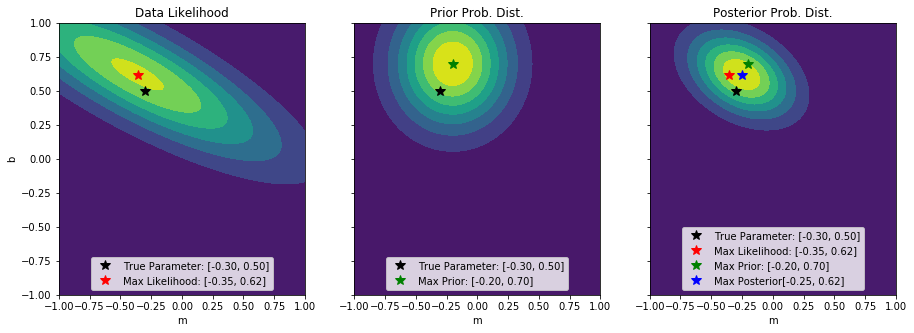

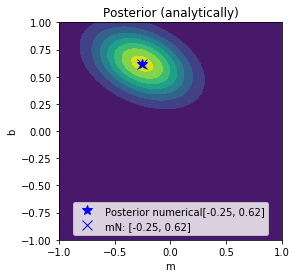

In [22]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

def line(x,b,m):
    return b+m*x;

def label(theta):
    return "[%2.2f, %2.2f]" %(theta[0],theta[1]);

def linearmodel(x,w):
    phi = lineRegressor(x);
    return phi.dot(w);

#create data from polyonimal model
N = 5;
x_std = 0.3; #data variance assumed to be known a priori
mb0 = np.array([[-0.3],[0.5]])
x = np.vstack(np.linspace(0,3,int(N)));
t = linearmodel(x,mb0) + np.vstack(np.random.normal(0,x_std,x.shape[0]))

#draw data
tempx = np.vstack(np.linspace(-5,5,10));
plt.plot(tempx,linearmodel(tempx,mb0),'k--',label=label(mb0.ravel()));
plt.plot(x,t,'k.',markersize=20,label='data points',markeredgecolor='w');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

def likelihood(t,model,x,w,std):
    mu = model(x,w);
    ps = stats.norm.pdf(t,mu,std)
    l = 1;
    for p in ps:
        l = l*p;
    return l;

def lineRegressor(x):
    x = np.array(x,ndmin=2);#make sure scalars are treated as matrices
    ones = np.ones((np.shape(x)[0],1));
    phi = np.concatenate((ones,x), axis=1);
    return phi;

#create array to cover parameter space
res = 100;
M,B = np.meshgrid(np.linspace(-1,1,res),np.linspace(-1,1,res));
MB = np.c_[M.ravel(),B.ravel()];
print(M.shape)

#calculate likelihood function
beta = 1; #standard deviation of data likelihood assumed to be known
L = np.array([likelihood(t,linearmodel,x,mb.reshape(2,1),beta) for mb in MB]).reshape(M.shape)

#draw
f,(ax2,ax3,ax4) = plt.subplots(1,3,figsize=(15,5),sharey=True);

#draw likelihood function
ax2.contourf(M,B,L);
ax2.set_title('Data Likelihood')
ax2.set_xlabel('m');
ax2.set_ylabel('b')
ax2.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
mbMLE = MB[L.argmax()]
ax2.plot(mbMLE[0],mbMLE[1],'r*',markersize=10,label='Max Likelihood: '+label(mbMLE));
ax2.legend(loc='lower center')

#prior distribution
S0 = np.array([[0.1,0],[0.0,0.1]]);
m0 = np.array([[-0.2],[0.7]]);
Prior = stats.multivariate_normal.pdf(MB,m0.ravel(),S0);
Prior = Prior.reshape(M.shape);
ax3.contourf(M,B,Prior)
ax3.set_title('Prior Prob. Dist.')
ax3.set_xlabel('m');
ax3.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
ax3.plot(m0[0],m0[1],'g*',markersize=10,label='Max Prior: '+label(m0));
ax3.legend(loc='lower center')

#posterior
Posterior = np.multiply(Prior,L)
print(Posterior)
ax4.contourf(M,B,Posterior)
ax4.set_title('Posterior Prob. Dist.')
ax4.set_xlabel('m');
mbPost = MB[Posterior.argmax()]
ax4.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
ax4.plot(mbMLE[0],mbMLE[1],'r*',markersize=10,label='Max Likelihood: '+label(mbMLE));
ax4.plot(m0[0],m0[1],'g*',markersize=10,label='Max Prior: '+label(m0));
ax4.plot(mbPost[0],mbPost[1],'b*',markersize=10,label='Max Posterior'+label(mbPost));
ax4.legend(loc='lower center');

#Calculate posterior distribution using the analytical solution

#generate regression matrix from input values for the line model
Phi = lineRegressor(x);

#calculate covariance matrix
SN_inv = np.linalg.inv(S0) + beta*Phi.T.dot(Phi)
SN = np.linalg.inv(SN_inv);

#calculate mean value (that is the maximum likelihood value)
mN = SN.dot( np.linalg.inv(S0).dot(m0) + beta*Phi.T.dot(t));

#generate distribution object using the stats package for plotting
PosteriorAnalytical = stats.multivariate_normal.pdf(MB,mN.ravel(),SN);

#plot the distribution
plt.figure(figsize=(4,4))
plt.contourf(M,B,PosteriorAnalytical.reshape(M.shape))
plt.plot(mbPost[0],mbPost[1],'b*',markersize=10,label='Posterior numerical'+label(mbPost));
plt.plot(mN[0],mN[1],'bx',markersize=10,label='mN: '+label(mN))
plt.title('Posterior (analytically)')
plt.xlabel('m');
plt.ylabel('b');
plt.legend(loc='lower center');